In [1]:
!pip install PyVCF

  Created wheel for PyVCF: filename=PyVCF-0.6.8-cp37-cp37m-linux_x86_64.whl size=124143 sha256=63acbc4d418a67fc8b43d7a9a2aea4de99900fd3a9dc4c54c5c6c0a6c26160b9
  Stored in directory: /root/.cache/pip/wheels/8a/60/8d/fe98f8401a0bb73b44afbbc454d1d7fe11a0a2081f5b899597
Successfully built PyVCF


In [2]:
import os
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import FloatProgress
%matplotlib inline
plt.style.use('ggplot')

# PyVCF

In [6]:
VCF_FILE_NAME = '/content/drive/MyDrive/Quantitative_Biological_Research_with_Python/VCF_Multivar_Analysis/ALL.chr17.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.41100000-41300000.vcf.gz'
vcf_file_path = os.path.join(VCF_FILE_NAME)

with gzip.open(vcf_file_path, 'rt') as f:
    print(f.read(100000))

##fileformat=VCFv4.1
##INFO=<ID=LDAF,Number=1,Type=Float,Description="MLE Allele Frequency Accounting for LD">
##INFO=<ID=AVGPOST,Number=1,Type=Float,Description="Average posterior probability from MaCH/Thunder">
##INFO=<ID=RSQ,Number=1,Type=Float,Description="Genotype imputation quality from MaCH/Thunder">
##INFO=<ID=ERATE,Number=1,Type=Float,Description="Per-marker Mutation rate from MaCH/Thunder">
##INFO=<ID=THETA,Number=1,Type=Float,Description="Per-marker Transition rate from MaCH/Thunder">
##INFO=<ID=CIEND,Number=2,Type=Integer,Description="Confidence interval around END for imprecise variants">
##INFO=<ID=CIPOS,Number=2,Type=Integer,Description="Confidence interval around POS for imprecise variants">
##INFO=<ID=END,Number=1,Type=Integer,Description="End position of the variant described in this record">
##INFO=<ID=HOMLEN,Number=.,Type=Integer,Description="Length of base pair identical micro-homology at event breakpoints">
##INFO=<ID=HOMSEQ,Number=.,Type=String,Description="Seque

In [7]:
import vcf
vcf_reader = vcf.Reader(filename = vcf_file_path, compressed = True)

In [8]:
print(vcf_reader.metadata)
print('*' * 50)

for key, value in vcf_reader.metadata.items():
    print('%s: %s' % (key, value))

OrderedDict([('fileformat', 'VCFv4.1'), ('reference', 'GRCh37')])
**************************************************
fileformat: VCFv4.1
reference: GRCh37


In [9]:
for name, info in vcf_reader.infos.items():
    print('%s [%s]: %s' % (name, info.type, info.desc))

LDAF [Float]: MLE Allele Frequency Accounting for LD
AVGPOST [Float]: Average posterior probability from MaCH/Thunder
RSQ [Float]: Genotype imputation quality from MaCH/Thunder
ERATE [Float]: Per-marker Mutation rate from MaCH/Thunder
THETA [Float]: Per-marker Transition rate from MaCH/Thunder
CIEND [Integer]: Confidence interval around END for imprecise variants
CIPOS [Integer]: Confidence interval around POS for imprecise variants
END [Integer]: End position of the variant described in this record
HOMLEN [Integer]: Length of base pair identical micro-homology at event breakpoints
HOMSEQ [String]: Sequence of base pair identical micro-homology at event breakpoints
SVLEN [Integer]: Difference in length between REF and ALT alleles
SVTYPE [String]: Type of structural variant
AC [Integer]: Alternate Allele Count
AN [Integer]: Total Allele Count
AA [String]: Ancestral Allele, ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/pilot_data/technical/reference/ancestral_alignments/README
AF [Float]: Glo

In [10]:
print(len(vcf_reader.samples))
print(vcf_reader.samples[:10])

1092
['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00101', 'HG00102', 'HG00103', 'HG00104', 'HG00106', 'HG00108']


In [11]:
record = next(vcf_reader)
print('Chromosome %s at %d: %s --> %s (%s)' % (record.CHROM, record.POS, record.REF, record.ALT, record.ID))
print(type(record.ALT))
print(record.INFO)

Chromosome 17 at 41100028: C --> [T] (rs139112950)
<class 'list'>
{'THETA': 0.0009, 'ERATE': 0.0004, 'AA': 'C', 'AN': 2184, 'LDAF': 0.001, 'VT': 'SNP', 'RSQ': 0.5058, 'AVGPOST': 0.9989, 'SNPSOURCE': ['LOWCOV'], 'AC': [1], 'AF': 0.0005, 'ASN_AF': 0.0017}


In [12]:
print(record.var_type)
print(record.is_snp, record.is_indel)
print(record.alleles)

snp
True False
['C', T]


In [13]:
print(len(record.samples))
print(record.samples[:10])

1092
[Call(sample=HG00096, CallData(GT=0|0, DS=0.0, GL=[-0.03, -1.2, -5.0])), Call(sample=HG00097, CallData(GT=0|0, DS=0.0, GL=[-0.0, -2.07, -5.0])), Call(sample=HG00099, CallData(GT=0|0, DS=0.0, GL=[-0.0, -3.52, -5.0])), Call(sample=HG00100, CallData(GT=0|0, DS=0.0, GL=[-0.01, -1.48, -5.0])), Call(sample=HG00101, CallData(GT=0|0, DS=0.0, GL=[-0.0, -2.12, -5.0])), Call(sample=HG00102, CallData(GT=0|0, DS=0.0, GL=[-0.0, -2.35, -5.0])), Call(sample=HG00103, CallData(GT=0|0, DS=0.0, GL=[-0.0, -2.06, -5.0])), Call(sample=HG00104, CallData(GT=0|0, DS=0.0, GL=[-0.0, -2.48, -5.0])), Call(sample=HG00106, CallData(GT=0|0, DS=0.0, GL=[-0.13, -0.61, -2.26])), Call(sample=HG00108, CallData(GT=0|0, DS=0.0, GL=[-0.0, -2.05, -5.0]))]


In [14]:
call = record.samples[0]
print(call)
print(call.sample)
print(call.gt_alleles)
print(call.gt_bases)
print(call.is_variant, call.is_het)

Call(sample=HG00096, CallData(GT=0|0, DS=0.0, GL=[-0.03, -1.2, -5.0]))
HG00096
['0', '0']
C|C
False False


In [15]:
print(record.genotype('HG00096'))
print(record.get_hom_refs()[:3])
print(record.get_hets())
print(record.get_hom_alts())
print(record.get_unknowns())
print(record.num_called, record.num_hom_ref, record.num_het, record.num_hom_alt, record.num_unknown)

Call(sample=HG00096, CallData(GT=0|0, DS=0.0, GL=[-0.03, -1.2, -5.0]))
[Call(sample=HG00096, CallData(GT=0|0, DS=0.0, GL=[-0.03, -1.2, -5.0])), Call(sample=HG00097, CallData(GT=0|0, DS=0.0, GL=[-0.0, -2.07, -5.0])), Call(sample=HG00099, CallData(GT=0|0, DS=0.0, GL=[-0.0, -3.52, -5.0]))]
[Call(sample=NA19009, CallData(GT=1|0, DS=1.0, GL=[-5.0, 0.0, -5.0]))]
[]
[]
1092 1091 1 0 0


# Example: building DNA substitution matrix

In [16]:
[record.INFO['AF']]

[0.0005]

In [17]:
from itertools import islice

BASES = list('ACGT')

dna_sub_matrix = pd.DataFrame(0, index = BASES, columns = BASES)

N_RECORDS = 5000
progress_bar = FloatProgress(max = N_RECORDS)
display(progress_bar)

for i, record in enumerate(islice(vcf.Reader(filename = vcf_file_path, compressed = True), N_RECORDS)):

    progress_bar.value = i

    if record.is_snp:
        for alt_allele, frequency in zip(record.ALT, [record.INFO['AF']]):
            dna_sub_matrix.loc[record.REF, alt_allele.sequence] += frequency
            
dna_sub_matrix = dna_sub_matrix.div(dna_sub_matrix.sum(axis = 1), axis = 0)
display(dna_sub_matrix)

FloatProgress(value=0.0, max=5000.0)

,A,C,G,T
A,0.000000,0.207550,0.680847,0.111602
C,0.165425,0.000000,0.172801,0.661774
G,0.682939,0.156534,0.000000,0.160527
T,0.060868,0.810318,0.128813,0.000000


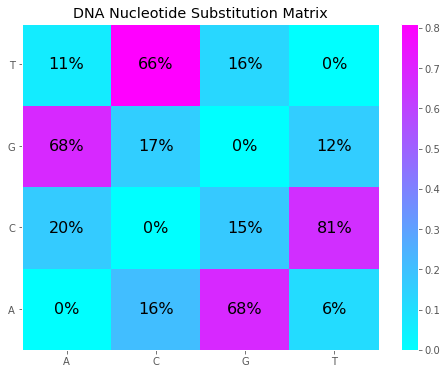

In [18]:
fig, ax = plt.subplots(figsize = (8, 6))
heatmap = ax.pcolor(dna_sub_matrix, cmap = 'cool', vmin = 0)
fig.colorbar(heatmap)

ax.set_xticks(np.arange(len(BASES)) + 0.5)
ax.set_xticklabels(BASES)
ax.set_yticks(np.arange(len(BASES)) + 0.5)
ax.set_yticklabels(BASES)

for i in range(len(BASES)):
    for j in range(len(BASES)):
        ax.text(i + 0.5, j + 0.5, '%d%%' % (100 * dna_sub_matrix.iloc[i, j]), ha = 'center', va = 'center', color = 'black',
                fontsize = 16)

_ = ax.set_title('DNA Nucleotide Substitution Matrix')

In-group transitions of Purines (Adenine & Guanine) and Pyrimidines (Cytosine & Thymine) are more common than cross-group transversions.